Para resolver isso, foi solicitado que você identifique e remova as amostras que apresentam os seguintes problemas:

Valores nulos: são valores ausentes em algumas das colunas que devem ser preenchidos para que a análise seja correta.              
Duplicatas: registros iguais que podem prejudicar a análise dos dados, já que estão representando a mesma informação.                
Strings vazias: valores de texto que não apresentam nenhum conteúdo escrito, o que pode dificultar a análise de dados, principalmente se a coluna tiver muitos valores assim.                      
Conversão de tipos: algumas colunas do arquivo podem estar no tipo de dados errado, como texto em vez de número, o que pode prejudicar a análise. Nesse caso você deve realizar a conversão para o tipo correto de cada coluna.                                             
Dentro desse contexto, você precisará de uma abordagem sistemática para limpar os dados. Assim, como isso pode ser feito?                       

In [150]:
import pandas as pd
link = 'https://caelum-online-public.s3.amazonaws.com/2929-pandas/cursos_cadastrados.json'


Parece que você está tentando carregar dados de um arquivo JSON usando o módulo json no Python. No entanto, o link que você forneceu parece ser uma URL, não um caminho local. Para carregar dados diretamente de uma URL, você pode usar a biblioteca requests para obter o conteúdo e, em seguida, usar json.loads para carregar os dados.

In [151]:
import requests
import json
# Obter o conteúdo da URL
response = requests.get(link)

# Verificar se a solicitação foi bem-sucedida (código de status 200)
if response.status_code == 200:
    # Carregar os dados JSON
    dados = json.loads(response.text)
    # Agora, você pode usar os dados como desejar, por exemplo, convertendo para um DataFrame do Pandas
    df = pd.DataFrame(dados)
else:
    print("Falha ao obter dados. Código de status:", response.status_code)

In [152]:


df = pd.json_normalize(dados)


In [153]:
df.head(5)

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


In [154]:
# tratando valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               6 non-null      object
 1   categoria           6 non-null      object
 2   carga_horaria       5 non-null      object
 3   concluintes         5 non-null      object
 4   data_inicio         5 non-null      object
 5   data_conclusao      5 non-null      object
 6   descricao           5 non-null      object
 7   preco               5 non-null      object
 8   instrutor.nome      6 non-null      object
 9   instrutor.email     6 non-null      object
 10  instrutor.telefone  6 non-null      object
dtypes: object(11)
memory usage: 656.0+ bytes


In [155]:
# quantidade de amostra nula por colunas
df.isna().sum()

curso                 0
categoria             0
carga_horaria         1
concluintes           1
data_inicio           1
data_conclusao        1
descricao             1
preco                 1
instrutor.nome        0
instrutor.email       0
instrutor.telefone    0
dtype: int64

In [156]:
df.isnull().sum().sum()

6

In [157]:
# Para entender o código, vamos dividi-lo em partes:

# df.isna() retorna um DataFrame com a mesma forma que df, contendo valores booleanos indicando quais elementos do DataFrame df são valores ausentes (NaN).
# df.isna().any(axis=1) retorna uma série booleana que indica se cada linha do DataFrame df contém pelo menos um valor ausente. O parâmetro axis=1 indica que a verificação deve ser feita por linha.
# df[df.isna().any(axis=1)] utiliza a série booleana retornada na etapa anterior como índice para o DataFrame df, retornando apenas as linhas que possuem pelo menos um valor ausente.

In [158]:
# para verificar onde estão os dados nulos
df[df.isna().any(axis=1)]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888


In [159]:
# excluindo valores nulos

df.dropna(inplace=True)

In [160]:
df[df.isna().any(axis=1)]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone


In [161]:
# identificando valores duplicados
df.duplicated()

0    False
2    False
3    False
4    False
5     True
dtype: bool

In [162]:
# removendo valores duplicados
df.drop_duplicates(inplace=True)

In [163]:
# identificando valores duplicados
df.duplicated()

0    False
2    False
3    False
4    False
dtype: bool

In [164]:
df[df['instrutor.nome'] == '']
df[df['data_conclusao'] == '']

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


In [165]:
# substituindo valores vazio por nulos
#pd.NA nulo da bilioteca pandas
df.replace('',pd.NA,inplace=True)

In [166]:
df[df['instrutor.nome'] == '']
df[df['data_conclusao'] == '']

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone


In [167]:
# removendo valores nulos
df.dropna(inplace=True)

In [168]:
df.isnull().sum()

curso                 0
categoria             0
carga_horaria         0
concluintes           0
data_inicio           0
data_conclusao        0
descricao             0
preco                 0
instrutor.nome        0
instrutor.email       0
instrutor.telefone    0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      object
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: object(11)
memory usage: 192.0+ bytes


In [170]:
# Converte a concluintes para o tipo inteiro
# Converte a coluna data_inicio e data_conclusao para o tipo datetime
# Convertendo a coluna preço para o tipo float

df['concluintes'] = df['concluintes'].astype(int)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      int32 
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: int32(1), object(10)
memory usage: 184.0+ bytes


In [176]:

df[['data_inicio','data_conclusao']] = df[['data_inicio', 'data_conclusao']].apply(pd.to_datetime)

# df['data_inicio'] = df['data_inicio'].apply(pd.to_datetime)
# df['data_conclusao'] =df['data_conclusao'].apply(pd.to_datetime)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int32         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      object        
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), int32(1), object(8)
memory usage: 184.0+ bytes


In [178]:
df['preco'] = df['preco'].astype(float)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int32         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 184.0+ bytes


Foi informado que nessa base de dados há possíveis fraudes que podem ser identificadas através dos outliers no “valor da transação”. Basicamente a fraude seria um outlier.

Sua missão é construir uma função que recebe dois parâmetros, a coluna que você quer analisar se tem outlier e o DataFrame em questão. A intenção de fazer isso é aproveitar novamente essa função tanto para outras colunas quanto para outros DataFrames futuramente em outras análises. O método que deve ser implementado para identificação do outlier é do intervalo interquartil.

Como podemos fazer isso?

In [180]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [181]:
df

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"
5,6,913,2022-01-06,"Nova Iorque, EUA"
6,7,250,2022-01-07,"São Paulo, Brasil"
7,8,400,2022-01-08,"São Paulo, Brasil"
8,9,200,2022-01-09,"São Paulo, Brasil"
9,10,150,2022-01-10,"Rio de Janeiro, Brasil"


In [182]:
df.describe()

,ID da transação,Valor da transação
count,30.000000,30.000000
mean,15.500000,325.633333
std,8.803408,214.442579
min,1.000000,100.000000
25%,8.250000,200.000000
50%,15.500000,250.000000
75%,22.750000,400.000000
max,30.000000,913.000000


In [183]:
# selecionando o primeiro quartill
dados = df.copy()


In [198]:
def calcu_outlierns(dataframe, coluna):
    q1 = dataframe[coluna].quantile(.25)
    q3 =dataframe[coluna].quantile(.75)
    IQR = q3 - q1
    limite_inferior = q1 - 1.5 * IQR
    limite_superior = q3 + 1.5 * IQR
    outliers_index = (dataframe[coluna] < limite_inferior) | (dataframe[coluna] > limite_superior)
    #valores fora do padrão 
    return dataframe[outliers_index]


    
    


In [199]:
calcu_outlierns(dados, 'Valor da transação')

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"


In [191]:
dados[outliers_index]
#valores fora do padrão 

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"


<Axes: xlabel='Valor da transação'>

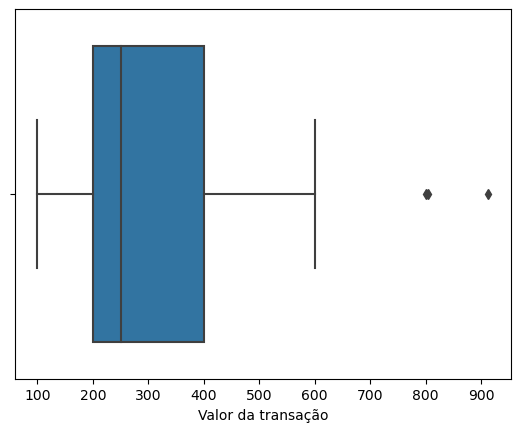

In [200]:

import seaborn as sns 
 
 # criando uma função grafico
def grafico_boxplot(dataframe, coluna):
    return sns.boxplot(x=dataframe[coluna])


grafico_boxplot(dados, 'Valor da transação')

